# <center> Heart Disease Prediction

- Abstract:

Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.


- Problem Statement:

Analyze the heart disease dataset to explore the machine learning algorithms and build a decision tree model to predict the disease.


- Variable Description:

-- age : Age of the patient

-- gender: Gender of the patient - (0,1) - (Male, Female)

-- chest_pain: It refers to the chest pain experienced by the patient -(0,1,2,3)

-- rest_bps: Blood pressure of the patient while resting(in mm/Hg)

-- cholesterol: Patient's cholesterol level (in mg/dl)

-- fasting_blood_sugar: The blood sugar of the patient while fasting

-- rest_ecg: Potassium level (0,1,2)

-- thalach: The patient’ s maximum heart rate

-- exer_angina: It refers to exercise-induced angina - (1=Yes, 0=No)
 
-- old_peak: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)

-- slope: It refers to the slope of the peak of the exercise ST-Segment- (0,1,2)

-- ca: Number of major vessels - (0,1,2,3,4)

-- thalassemia: It refers to thalassemia which is a blood disorder - (0,1,2,3)

-- target: The patient has heart disease or not - (1=Yes, 0=No)


- Scope:

●	Understand data by performing exploratory data analysis
●	Training and building Decision Tree classification algorithm to predict if a patient has heart disease
●	Understand feature importances and improve the model
●	Understand various model performance metrics and measure the performance of each model


## *Getting Data* 

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pylab as pl
#pd.set_option('display.max_rows',None)

In [2]:
# Reading the CSV file
heart = pd.read_csv(r'HeartDisease.csv')

In [3]:
# Dimensions of dataframe
heart.shape

(303, 14)

In [4]:
# Number of elements in dataframe
heart.size

4242

In [5]:
heart.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# Summary of datframe
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Changing data type of categorical Independant variables

heart.gender = heart.gender.astype('category')
heart.chest_pain = heart.chest_pain.astype('category')
heart.rest_ecg = heart.rest_ecg.astype('category')
heart.exer_angina = heart.exer_angina.astype('category')
heart.slope = heart.slope.astype('category')
heart.ca = heart.ca.astype('category')
heart.thalassemia = heart.thalassemia.astype('category')
heart.target = heart.target.astype('category')
heart.fasting_blood_sugar = heart.fasting_blood_sugar.astype('category')

In [9]:
# Statistical summary 
heart.describe(include='all')

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.0,303.0,303.000000,303.000000,303.0,303.0,303.000000,303.0,303.000000,303.0,303.0,303.0,303.0
unique,NaN,2.0,4.0,NaN,NaN,2.0,3.0,NaN,2.0,NaN,3.0,5.0,4.0,2.0
top,NaN,1.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,NaN,2.0,0.0,2.0,1.0
freq,NaN,207.0,143.0,NaN,NaN,258.0,152.0,NaN,204.0,NaN,142.0,175.0,166.0,165.0
mean,54.366337,NaN,NaN,131.623762,246.264026,NaN,NaN,149.646865,NaN,1.039604,NaN,NaN,NaN,NaN
std,9.082101,NaN,NaN,17.538143,51.830751,NaN,NaN,22.905161,NaN,1.161075,NaN,NaN,NaN,NaN
min,29.000000,NaN,NaN,94.000000,126.000000,NaN,NaN,71.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,47.500000,NaN,NaN,120.000000,211.000000,NaN,NaN,133.500000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,55.000000,NaN,NaN,130.000000,240.000000,NaN,NaN,153.000000,NaN,0.800000,NaN,NaN,NaN,NaN
75%,61.000000,NaN,NaN,140.000000,274.500000,NaN,NaN,166.000000,NaN,1.600000,NaN,NaN,NaN,NaN


- This dataset contains total 13 Independent variables. 'Target' is our dependent variable.
- 8 Independent variables are categorical in nature and 5 are continuous.
- Variables 'Age', 'thalach' are left skewed and 'rest_bps', 'cholestrol', old_peak this are right skewed. 

In [10]:
# Creating seperate dataframe according to data type
categorical_variables = heart.select_dtypes('category')
continuous_variables = heart.select_dtypes(['int','float'])

In [11]:
# Identifying unique values and its count
for i in categorical_variables.columns:
    print('Variable name is:',i)
    print('\nUnique values are:\n',heart[i].unique())
    print('\nValue count is\n',heart[i].value_counts())
    print('**********************************************')

Variable name is: gender

Unique values are:
 [1, 0]
Categories (2, int64): [0, 1]

Value count is
 1    207
0     96
Name: gender, dtype: int64
**********************************************
Variable name is: chest_pain

Unique values are:
 [3, 2, 1, 0]
Categories (4, int64): [0, 1, 2, 3]

Value count is
 0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64
**********************************************
Variable name is: fasting_blood_sugar

Unique values are:
 [1, 0]
Categories (2, int64): [0, 1]

Value count is
 0    258
1     45
Name: fasting_blood_sugar, dtype: int64
**********************************************
Variable name is: rest_ecg

Unique values are:
 [0, 1, 2]
Categories (3, int64): [0, 1, 2]

Value count is
 1    152
0    147
2      4
Name: rest_ecg, dtype: int64
**********************************************
Variable name is: exer_angina

Unique values are:
 [0, 1]
Categories (2, int64): [0, 1]

Value count is
 0    204
1     99
Name: exer_angina, dtype: 

- Number of females are more in data and our target variable is balanced.

## *Exploratory Data Analysis*

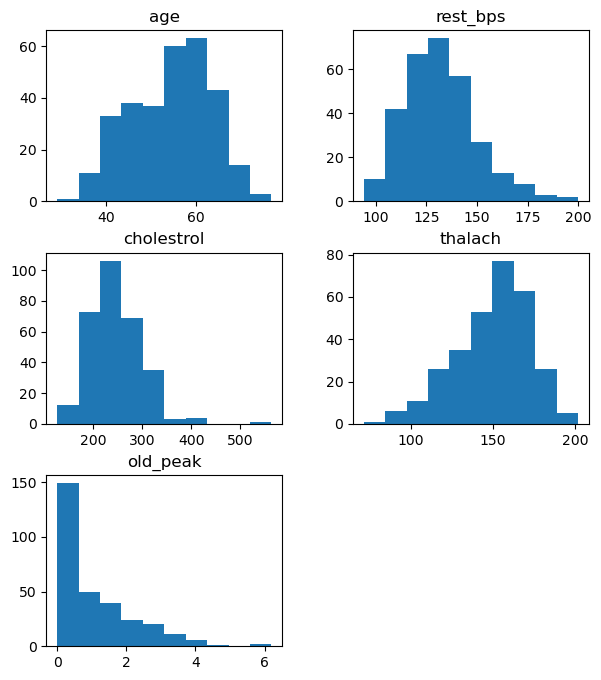

In [12]:
# Distribution of continuous variables
heart.hist(bins=10, grid=False, figsize=(7,8))
plt.show()

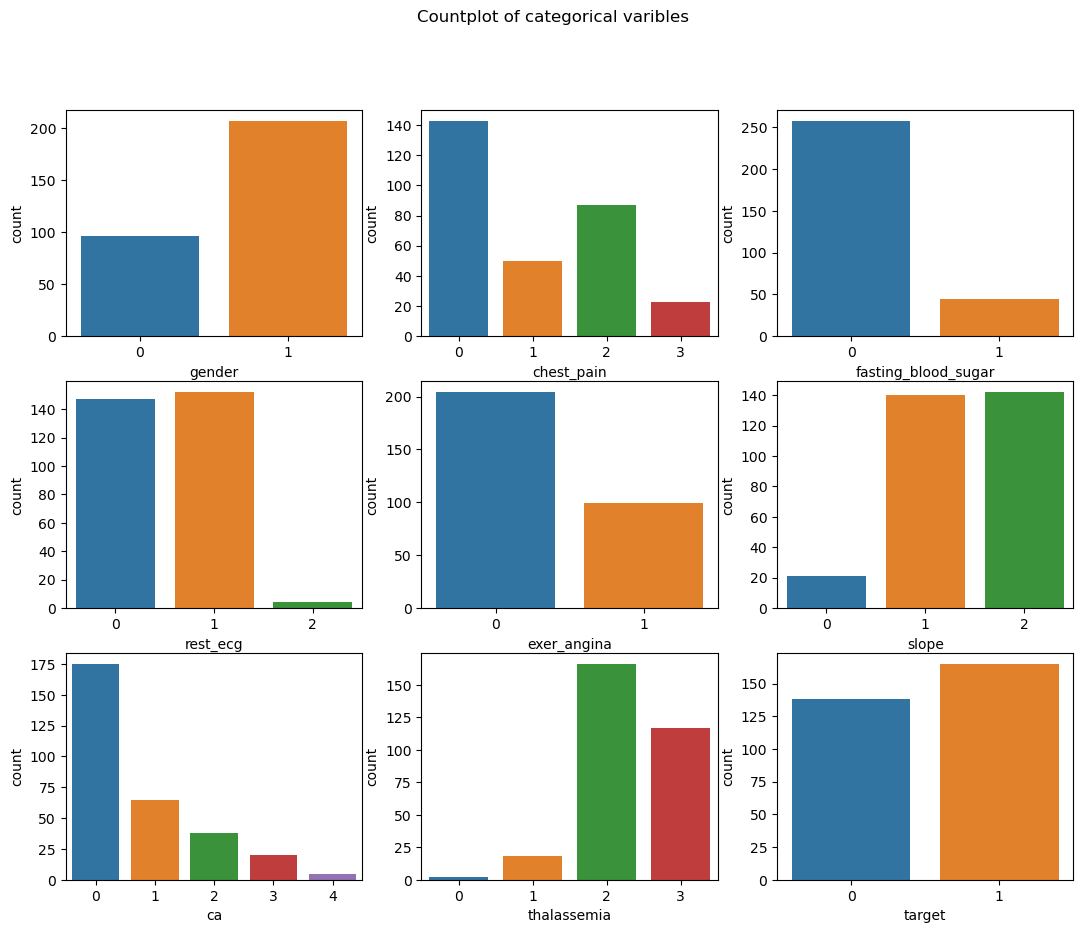

In [13]:
# Countplot of categorical variables

def plot_countplot(data_frame):         # creating function for countplot
    plt.figure(figsize=(13,10))
    for i in list(range(1,10)):
        plt.subplot(3,3,i)
        sns.countplot(x=data_frame.iloc[: ,i-1])
    plt.suptitle('Countplot of categorical varibles')
    plt.show()
    
plot_countplot(categorical_variables)  # calling the function

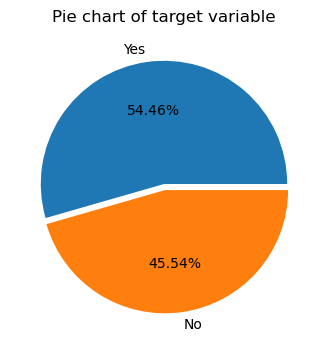

In [14]:
# Pie chart of target variable
plt.figure(figsize=(4,4))
plt.pie(heart.target.value_counts(), labels=['Yes', 'No'], autopct='%0.2f%%', explode=[0,0.05])
plt.title('Pie chart of target variable')
plt.show()

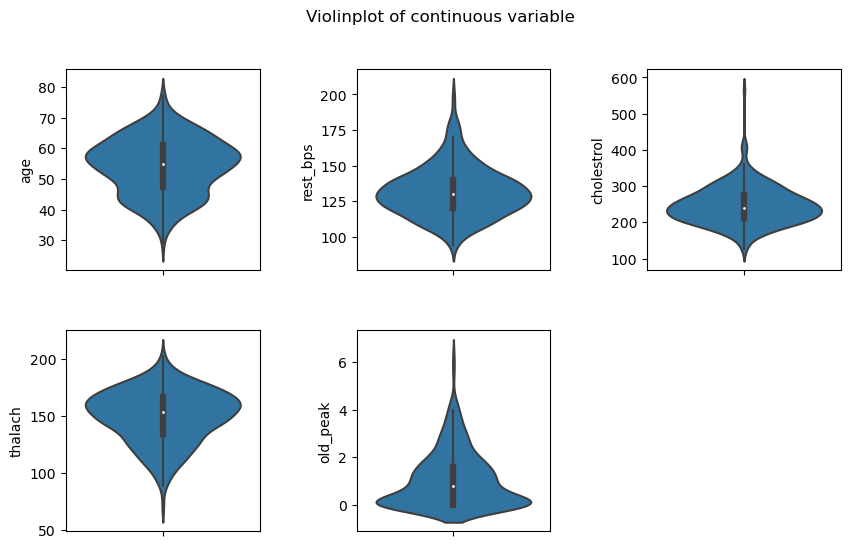

In [15]:
# Violinplot of categorical variables

plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.violinplot(y=heart.age)
plt.subplot(2,3,2)
sns.violinplot(y=heart.rest_bps)
plt.subplot(2,3,3)
sns.violinplot(y=heart.cholestrol)
plt.subplot(2,3,4)
sns.violinplot(y=heart.thalach)
plt.subplot(2,3,5)
sns.violinplot(y=heart.old_peak)
pl.subplots_adjust(hspace=0.3, wspace=0.5)
plt.suptitle('Violinplot of continuous variable')
plt.show()

- Patients between age group of 50-70 are more.
- Average of resting blood pressure and thalach is 131 mm\Hg and 149 respectivly which is greater than normal limit..
- It looks like typical angina(chest pain related to heart disease) is observed in 70% patients.
- Thalassemia which is a type of blood disorder seems to be affecting patients.
- The average cholesterol is 249 mg/dl which is concerning and from violiplot it is clear that many people have problem of high cholesterol.
- In short patients have high cholesterol, high thalach and high resting blood pressure which can be directly related to heart dieseas.

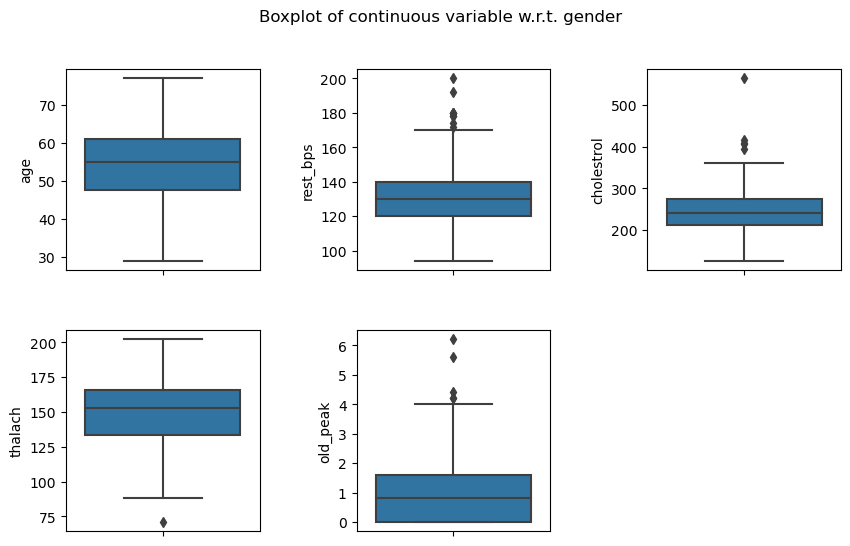

In [17]:
# Boxplot 
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
sns.boxplot( y=heart.age, orient='v')
plt.subplot(2,3,2)
sns.boxplot(y=heart.rest_bps, orient='v')
plt.subplot(2,3,3)
sns.boxplot(y=heart.cholestrol, orient='v')
plt.subplot(2,3,4)
sns.boxplot(y=heart.thalach, orient='v')
plt.subplot(2,3,5)
sns.boxplot(y=heart.old_peak, orient='v')
pl.subplots_adjust(hspace=0.3, wspace=0.5)
plt.suptitle('Boxplot of continuous variable w.r.t. gender')
plt.show()

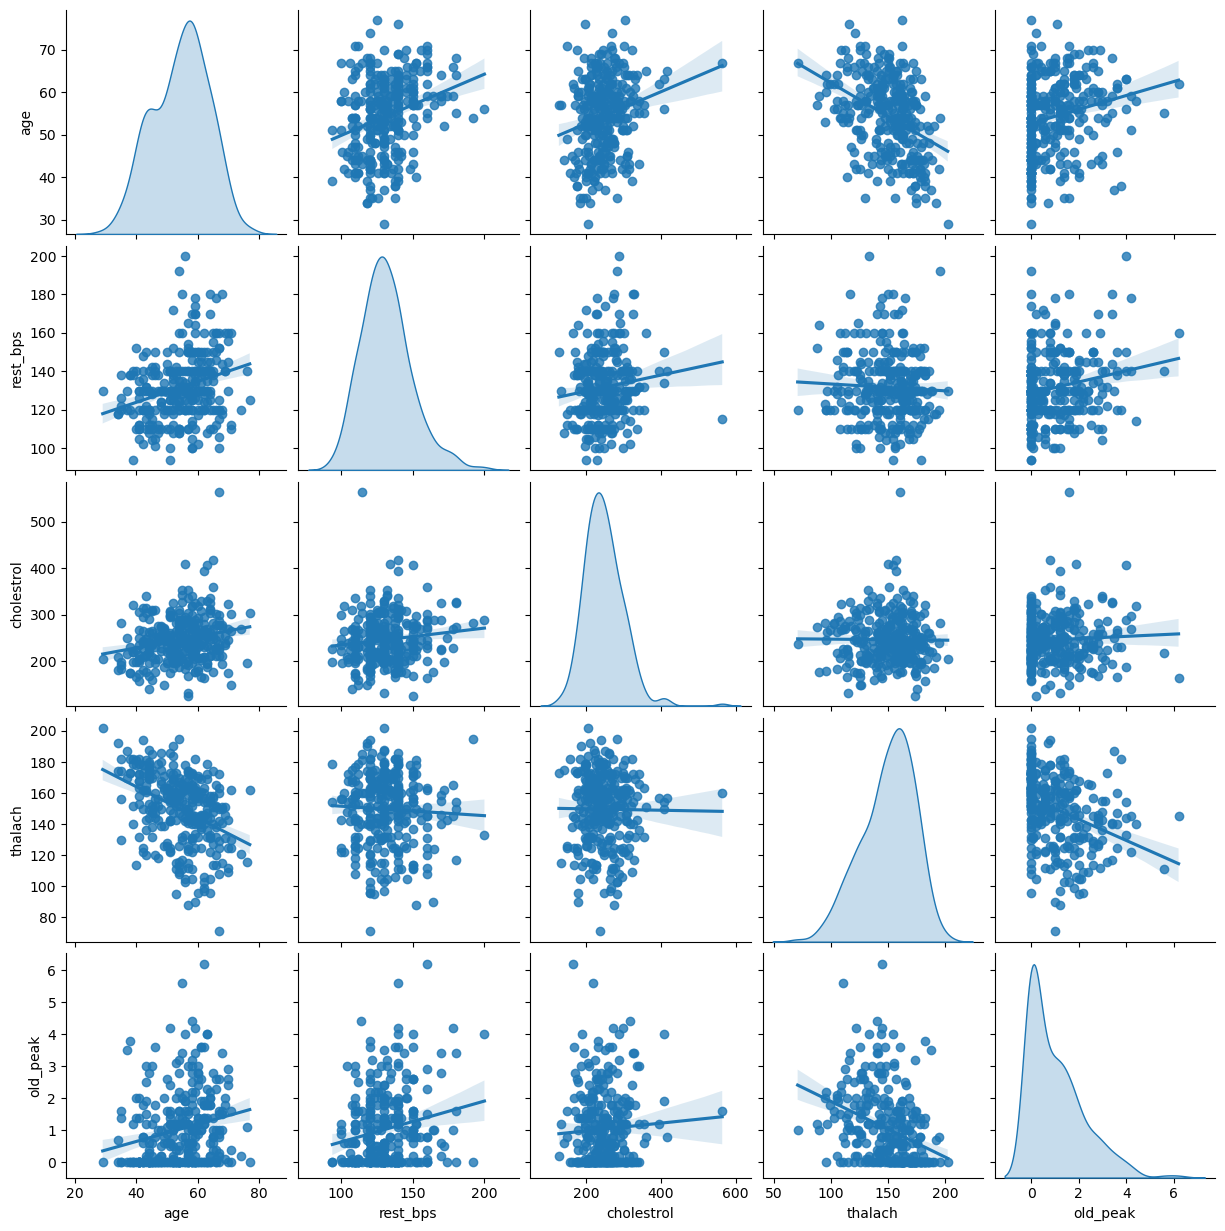

In [18]:
# Pairplot
sns.pairplot(heart, diag_kind='kde', kind='reg')
plt.show()

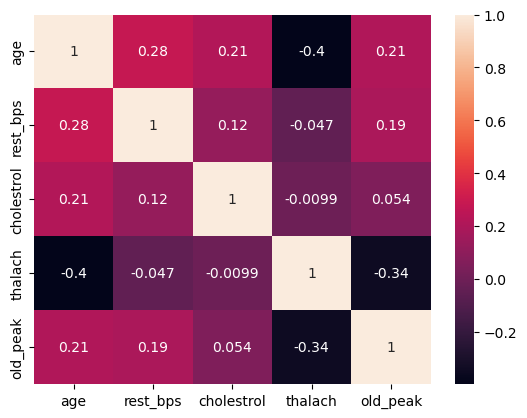

In [19]:
# Checking correlation
sns.heatmap(heart.corr(), annot=True)
plt.show()

- Outliers are present in 'rest_bps', 'cholestrol', 'thalach' and 'old_peak' variables we will work on them in preprocessing step.
- 'age' variable is showing slight positive relation with 'rest_bps', 'cholestrol', 'old_peak' and negative relation with 'thalach'.
- 'thalach' and 'old_peak' are also showing slight negative relation.

## *Data Preprocessing*

In [20]:
# Checking missing values
heart.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [21]:
# Checking not available values 
heart.isna().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [22]:
# Checking duplicates values
heart.duplicated().any()

True

In [24]:
# Dropping duplicates
heart.drop_duplicates(keep='first', inplace=True)

In [74]:
# Saving copy of data frame 
df = heart.copy(deep=True)

In [75]:
# Splitting data
x = df.drop('target', axis=1)
y = df['target']

In [76]:
# Treating Outliers
# Using IQR and replacing with median

for i in x.columns:
    if x[i].dtype == 'category' :       # Selecting only numerical column
        continue
    else:
        q1 = np.quantile(x[i],0.25)
        q3 = np.quantile(x[i],0.75)
        IQR = q3 - q1 
        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR
        x.loc[(x[i]<lower_bound) | (x[i]>upper_bound),i] = x[i].median()

In [77]:
# Feature scaling on df

from sklearn.preprocessing import StandardScaler

scaled = StandardScaler()

# Selecting only continuous variables
x.loc[:,['age','rest_bps','cholestrol','thalach','old_peak']] = scaled.fit_transform(x.loc[:,['age','rest_bps','cholestrol','thalach','old_peak']])  

In [78]:
# Splitting data into train and test

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=55)

print('Shape of train_x is', train_x.shape)
print('Shape of train_y is', train_y.shape)
print('Shape of test_x is', test_x.shape)
print('Shape of test_y is', test_y.shape)

Shape of train_x is (241, 13)
Shape of train_y is (241,)
Shape of test_x is (61, 13)
Shape of test_y is (61,)


## *Model Building*

### Model 1

In [79]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(train_x, train_y)

logreg_pred = logreg.predict(test_x)  # predicting on test_x

logreg_pred_prob = logreg.predict_proba(test_x)  # prediction in probablity

print('Train accuracy is %0.2f' %logreg.score(train_x, train_y))
print('Test accuracy is %0.2f' %logreg.score(test_x, test_y))

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report, f1_score

logreg_cfm = confusion_matrix(test_y, logreg_pred)
print(logreg_cfm)
print('Accuaracy is %0.2f' %accuracy_score(test_y, logreg_pred))
print('Precision is %0.2f' %precision_score(test_y, logreg_pred))
print('Recall is %0.2f' %recall_score(test_y, logreg_pred))
print('F1 score is %0.2f' %f1_score(test_y, logreg_pred))
print(classification_report(test_y, logreg_pred))

Train accuracy is 0.85
Test accuracy is 0.85
[[16  6]
 [ 3 36]]
Accuaracy is 0.85
Precision is 0.86
Recall is 0.92
F1 score is 0.89
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.86      0.92      0.89        39

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.85      0.85        61



- Logistic regression model accuracy is 85% with f1 score of 0.89. 
- Model is performing good in predicting both classes.

### Model 2

In [80]:
# Using Naive Bayes

from sklearn.naive_bayes import GaussianNB

naive = GaussianNB()

naive.fit(train_x, train_y)

naive_pred = naive.predict(test_x)

naive_pred_prob = naive.predict_proba(test_x)  # prediction in probablity

print('Train accuracy is %0.4f' %naive.score(train_x, train_y))
print('Test accuracy is %0.4f' %naive.score(test_x, test_y))

# Performance metrics
naive_cfm = confusion_matrix(test_y, naive_pred)
print(naive_cfm)
print('Accuaracy is %0.4f' %accuracy_score(test_y, naive_pred))
print('Precision is %0.4f' %precision_score(test_y, naive_pred))
print('Recall is %0.4f' %recall_score(test_y, naive_pred))
print('F1 score is %0.4f' %f1_score(test_y, naive_pred))
print(classification_report(test_y, naive_pred))

Train accuracy is 0.8340
Test accuracy is 0.8525
[[16  6]
 [ 3 36]]
Accuaracy is 0.8525
Precision is 0.8571
Recall is 0.9231
F1 score is 0.8889
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.86      0.92      0.89        39

    accuracy                           0.85        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.85      0.85        61



- Naive Bayes model accuracy is 0.85 and f1 score is 0.88.
- This model performing similar to Logistic regression.

### Model 3

In [81]:
# Using KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer        # Using min-max scaling

norm = Normalizer()
x1 = df.drop('target', axis=1)
y1 = df.target

x1.loc[:,['age','rest_bps','cholestrol','thalach','old_peak']] = norm.fit_transform(x1.loc[:,['age','rest_bps','cholestrol','thalach','old_peak']])
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Creating for loop to iterate through different values of k
knn_accuracy = []
k_ = []
for i in range(21):
    k = i+1
    knn = KNeighborsClassifier(n_neighbors=k)   # creating instance
    knn.fit(x_train, y_train)      # training model
    knn_pred = knn.predict(x_test)    # predicting values on test data
    knn_accuracy.append(round(accuracy_score(y_test, knn_pred),2))
    k_.append(k)

print(knn_accuracy)
print(k_)

[0.8, 0.79, 0.84, 0.8, 0.87, 0.85, 0.85, 0.8, 0.87, 0.89, 0.89, 0.89, 0.9, 0.89, 0.9, 0.87, 0.87, 0.87, 0.89, 0.89, 0.9]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [84]:
# Traning KNN model again on best n_neighbors
knn = KNeighborsClassifier(n_neighbors=9)   
knn.fit(x_train, y_train)      
knn_pred = knn.predict(x_test)   
print('Train acuuracy is %0.2f' %knn.score(x_train, y_train))
print('Test acuuracy is %0.2f' %knn.score(x_test, y_test))
print('Acuuracy score is %0.2f' %accuracy_score(y_test, knn_pred))
print('Precision is %0.2f' %precision_score(y_test, knn_pred))
print('Recall is %0.2f' %recall_score(y_test, knn_pred))
print('F1 score is %0.2f' %f1_score(y_test, knn_pred))
knn_cfm = confusion_matrix(y_test, knn_pred)
print(knn_cfm)
print('clssification report is\n',classification_report(y_test, knn_pred))

Train acuuracy is 0.87
Test acuuracy is 0.87
Acuuracy score is 0.87
Precision is 0.88
Recall is 0.88
F1 score is 0.88
[[25  4]
 [ 4 28]]
clssification report is
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



- Knn models accuracy is 87% and f1 score is 0.88.

### Model 4

In [86]:
# Using Support vector Machines
# Using min-max scaled data

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)  

print('Train accuracy is %0.4f' %svc.score(x_train, y_train))
print('Test accuracy is %0.4f' %svc.score(x_test, y_test))

svc_cfm = confusion_matrix(y_test, svc_pred)
print(svc_cfm)
print('Accuaracy is %0.2f' %accuracy_score(y_test, svc_pred))
print('Precision is %0.2f' %precision_score(y_test, svc_pred))
print('Recall is %0.2f' %recall_score(y_test, svc_pred))
print('F1 score is %0.2f' %f1_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Train accuracy is 0.8755
Test accuracy is 0.8852
[[26  3]
 [ 4 28]]
Accuaracy is 0.89
Precision is 0.90
Recall is 0.88
F1 score is 0.89
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



- SVC model accuracy is 89% with f1 score of 0.89.

### Model 5

In [91]:
# Using Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)
dt_pred = dt.predict(test_x)

print('Train accuracy is %0.2f' %dt.score(train_x, train_y))
print('Test accuracy is %0.2f' %dt.score(test_x, test_y))

dt_cfm = confusion_matrix(test_y, dt_pred)
print(dt_cfm)
print('Accuaracy is %0.2f' %accuracy_score(test_y, dt_pred))
print('Precision is %0.2f' %precision_score(test_y, dt_pred))
print('Recall is %0.2f' %recall_score(test_y, dt_pred))
print('F1 score is %0.2f' %f1_score(test_y, dt_pred))
print(classification_report(test_y, dt_pred))

Train accuracy is 1.00
Test accuracy is 0.77
[[16  6]
 [ 8 31]]
Accuaracy is 0.77
Precision is 0.84
Recall is 0.79
F1 score is 0.82
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        22
           1       0.84      0.79      0.82        39

    accuracy                           0.77        61
   macro avg       0.75      0.76      0.76        61
weighted avg       0.78      0.77      0.77        61



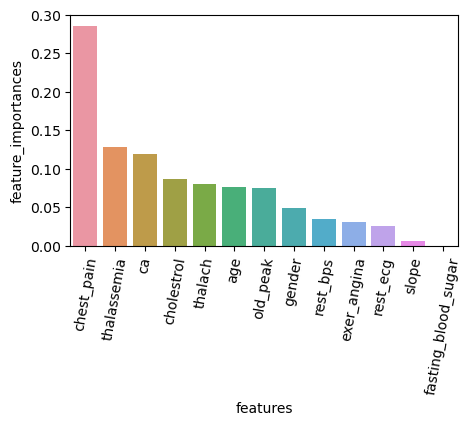

In [92]:
# Determining Importance of variables
feature_imp = pd.DataFrame({'features':train_x.columns, 'feature_importances':dt.feature_importances_}).sort_values('feature_importances',ascending=False)
plt.figure(1,figsize=(5,3))
sns.barplot(y=feature_imp.feature_importances, x=feature_imp.features)
plt.xticks(rotation=80)
plt.show()

- Here models train accuracy is 100% but test accuracy is 77% which means model is overfitting.
- Chest_pain is very important variable while fasting_blood_suger is least important.
- To avoid overfitting we will hypertune the model parameters.

In [176]:
# Grid SearchCV

from sklearn.model_selection import GridSearchCV, StratifiedKFold

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=20)

param = {'criterion':['gini', 'entropy'],
        'max_depth':list(range(3,11)),
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4],
        'max_features': ['sqrt', 'log2']}

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

grid = GridSearchCV(estimator=dt,
                   param_grid=param,
                   cv=folds,
                   scoring='f1',)

grid.fit(train_x,train_y)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=20, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5]},
             scoring='f1')

In [177]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [178]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=3)

In [184]:
# Training model again on best parameters

dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt', min_samples_leaf= 2, min_samples_split= 2)
dt.fit(train_x, train_y)
dt_pred = dt.predict(test_x)

print('Train accuracy is %0.2f' %dt.score(train_x, train_y))
print('Test accuracy is %0.2f' %dt.score(test_x, test_y))

dt_cfm = confusion_matrix(test_y, dt_pred)
print(dt_cfm)
print('Accuaracy is %0.2f' %accuracy_score(test_y, dt_pred))
print('Precision is %0.2f' %precision_score(test_y, dt_pred))
print('Recall is %0.2f' %recall_score(test_y, dt_pred))
print('F1 score is %0.2f' %f1_score(test_y, dt_pred))
print(classification_report(test_y, dt_pred))

Train accuracy is 0.83
Test accuracy is 0.82
[[18  4]
 [ 7 32]]
Accuaracy is 0.82
Precision is 0.89
Recall is 0.82
F1 score is 0.85
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.89      0.82      0.85        39

    accuracy                           0.82        61
   macro avg       0.80      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



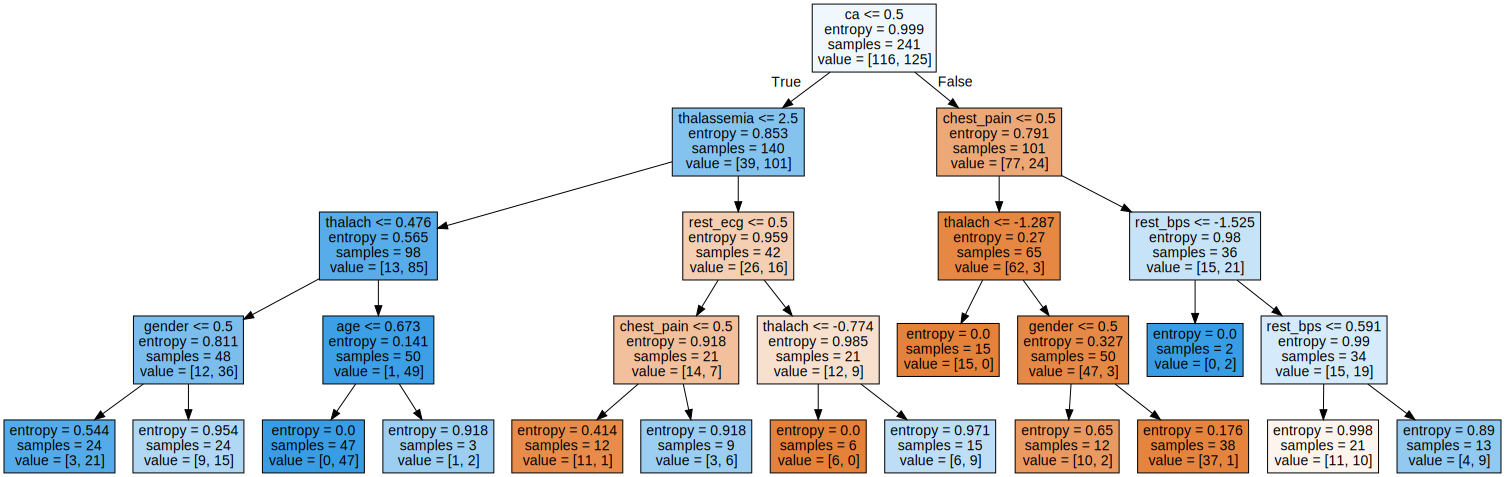

In [185]:
# Visualizing Decision Tree
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='decision_tree.dot', feature_names=train_x.columns, impurity=True, filled=True)
with open('decision_tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

- After performing the hypertuning accuracy of Model 5 is 82% with f1 score of 0.85.

In [191]:
performance_metrics = pd.DataFrame({'model':['model_1_logistic_reg','model_2_naive_bayes','model_3_KNN','model_4_SVC','model_5_DT'],
                                   'train_accuracy':[85, 83, 87, 87, 83],
                                   'test_accuracy':[85, 85, 87, 88, 82],
                                   'accuracy': [85, 85, 87, 89, 82],
                                   'precision':[86, 85, 88, 90, 89],
                                   'recall':[92, 72, 88, 88, 82],
                                   'f1_score':[89, 88, 88, 89, 85]})

### Results and conclusion

In [192]:
performance_metrics

,model,train_accuracy,test_accuracy,accuracy,precision,recall,f1_score
0,model_1_logistic_reg,85,85,85,86,92,89
1,model_2_naive_bayes,83,85,85,85,72,88
2,model_3_KNN,87,87,87,88,88,88
3,model_4_SVC,87,88,89,90,88,89
4,model_5_DT,83,82,82,89,82,85


- Based on above performance metrics both logistic regression model (model 1) and support vector classifier model (model 4) 
  are performing better than rest of the models with f1 score of 0.89.

In [193]:
result = pd.DataFrame({'target':test_y, 'logistic_regression':logreg_pred, 'Naive_Bayes':naive_pred, 'KNN':knn_pred, 'SVC':svc_pred, 'DT':dt_pred})
result.head(10)

,target,logistic_regression,Naive_Bayes,KNN,SVC,DT
96,1,1,1,0,0,1
215,0,0,0,1,0,0
139,1,0,0,1,1,0
271,0,0,0,0,0,0
86,1,1,1,1,1,0
81,1,1,1,1,1,1
111,1,1,1,1,1,1
62,1,1,1,0,0,1
157,1,1,1,0,0,1
4,1,1,1,1,0,1
